# Compute Drawdowns

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
me_m = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100

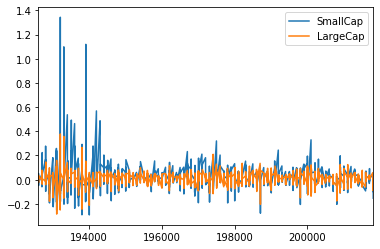

In [3]:
rets.plot.line()

In [4]:
# convert int64 to datetime
rets.index = pd.to_datetime(rets.index, format='%Y%m')
# convert to monthly period
rets.index = rets.index.to_period('M')

In [5]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
SmallCap    1110 non-null float64
LargeCap    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


## Checklist to compute
1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdowns: wealth value as a percentage of previous peak

In [6]:
# principle = $1000
wealth_index = 1000*(1+rets['LargeCap']).cumprod()

In [7]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

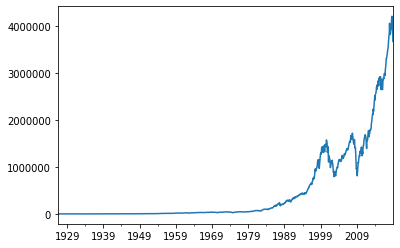

In [8]:
wealth_index.plot.line()

In [9]:
previous_peaks = wealth_index.cummax()

In [10]:
previous_peaks.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

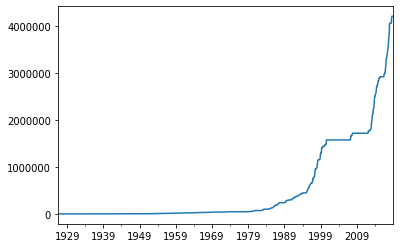

In [11]:
previous_peaks.plot.line()

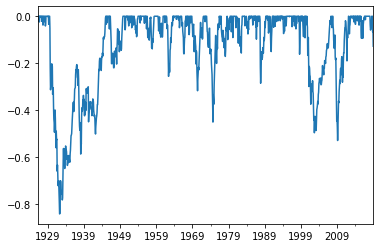

In [12]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

In [13]:
# largest drawdown
drawdown.min()

-0.8400375277943123

In [14]:
# recent drawdown
drawdown['1975':].min()

-0.5280945042309304

In [15]:
# find the date of the recent minimum
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [16]:
# find the date of all time minimum
drawdown.idxmin()

Period('1932-05', 'M')

## Create function for repetition

In [17]:
def drawdown(return_series: pd.Series):
    '''
    Takes a time series of asset returns,
    computes and returns a dataframe that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    '''
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        'wealth': wealth_index,
        'peaks': previous_peaks,
        'drawdown': drawdowns
    })

In [19]:
large_cap_drawdown = drawdown(rets['LargeCap'])
large_cap_drawdown.head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


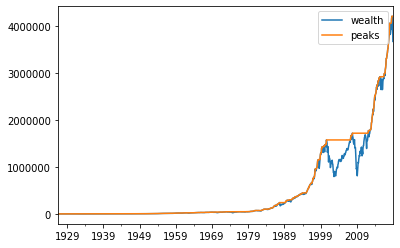

In [21]:
large_cap_drawdown[['wealth', 'peaks']].plot()

In [22]:
lc_fifties_drawdown = drawdown(rets[:'1950']['LargeCap'])

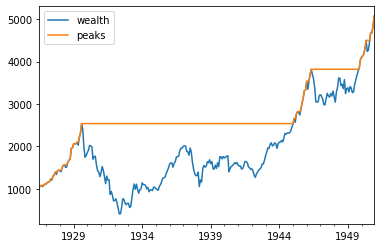

In [23]:
lc_fifties_drawdown[['wealth', 'peaks']].plot()

In [24]:
large_cap_drawdown['drawdown'].min()

-0.8400375277943123

In [25]:
small_cap_drawdown = drawdown(rets['SmallCap'])

In [26]:
small_cap_drawdown['drawdown'].min()

-0.8330007793945303

In [28]:
# small cap max drawdown, when?
small_cap_drawdown['drawdown'].idxmin()

Period('1932-05', 'M')

In [29]:
# more recent time small cap max drawdown
small_cap_drawdown['1940':]['drawdown'].min()

-0.7000596091967913

In [30]:
small_cap_drawdown['1940':]['drawdown'].idxmin()

Period('1974-12', 'M')

In [31]:
# most recent time small cap max drawdown
small_cap_drawdown['1975':]['drawdown'].min()

-0.631206807725239

In [33]:
small_cap_drawdown['1975':]['drawdown'].idxmin()

Period('2009-02', 'M')

In [34]:
# check if large cap suffered, as well
large_cap_drawdown['1975':]['drawdown'].min()

-0.5280945042309304

In [35]:
large_cap_drawdown['1975':]['drawdown'].idxmin()

Period('2009-02', 'M')